# Homework 4

This is an individual assignment.

**Due: Saturday, March 7 @ 11:59 PM**

## Grading Rubric

1. **Problem 1 (15 pts):** you've answered all 4 questions (4 points for problems 1,2 and 4, 3 points for problem 3).

2. **Problem 2 (15 pts):** you've answered all 2 questions (5 points first, 10 points second). 

3. **Problem 3 (20 pts):** you've answered all 4 questions (5 points each). 

4. **Problem 4 (10 pts):** you've answered all 2 questions (5 points each). 

5. **Problem 5 (15 pts):** you've answered all 3 questions (5 points each). 

6. **Problem 6 (10 pts):** you've answered and justified your answer.

7. **Problem 7 (15 pts):** you've answered all 3 questions (5 points each). 

**Total: 100 pts**

# Supervised Classification

In this assignment, you will test your knowledge about all supervised classifiers we have learned so far: $k$-Nearest Neighbors ($k$-NNs), Decision Trees, Random Forests, Support Vector Machines (SVMs) and the Perceptron. In particular, you will implement these models using ```scikit-learn``` and experiment different parameter values.

**You are allowed to use ```scikit-learn``` modules.**

**Objectives**

By completing this assignment you will practice and master the following skills:

* $k$-Nearest Neighbors
* Decision Trees
* Random Forests
* Support Vector Machines
* The Perceptron algorithm

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/a/Vj3ofz1F

# Problem 1 - $k$-Nearest Neighbors Classifier

Implement the $k$-NN algorithm in the [Breast Cancer Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (loaded in the code cell below) using Euclidean distance.

In order to successfully implement the $k$-NN algorithm, you should follow all the steps needed to conduct an ML problem.

Answer and justify the following questions:

1. What happens as you vary $K$ from small to large? Why? Include a plot that shows the accuracy performance as you vary $k$. 

2. What is the optimal value for $k$ given this data?

3. Compute the confusion matrix in the test set using the best value of $k$.

4. In a paragraph describe whether or not $k$-NN performs well in high dimensional feature spaces.

In [24]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(return_X_y=False)

# The data set contains 569 samples and 30 features
X=data.data # Training samples
print(type(X), X.shape)

# Target labels for all 569 samples. Malignant class has labels 0, benign class has label 1
y=data.target # Training labels
print(type(y), y.shape) 

print("Number of benign (1):\t%d" % list(y).count(1))
print("Number of malignant (0):\t%d" % list(y).count(0))

print("\nX: ", X) 
print("\ny: ", y)

<class 'numpy.ndarray'> (569, 30)
<class 'numpy.ndarray'> (569,)
Number of benign (1):	357
Number of malignant (0):	212

X:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1

In [2]:
# Uncomment the line below for a full data set description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.174e+01 1.402e+01 7.424e+01 ... 8.290e-02 3.101e-01 6.688e-02]
 [1.940e+01 1.818e+01 1.272e+02 ... 2.252e-01 3.590e-01 7.787e-02]
 [1.624e+01 1.877e+01 1.088e+02 ... 1.732e-01 2.770e-01 1.063e-01]]
score_arr:
[0.887719298245614, 0.8596491228070176, 0.9017543859649123, 0.8947368421052632, 0.9298245614035088, 0.9192982456140351, 0.9298245614035088, 0.9298245614035088, 0.9368421052631579, 0.9298245614035088, 0.9368421052631579, 0.9228070175438596, 0.9333333333333333, 0.9228070175438596, 0.9263157894736842, 0.9192982456140351, 0.9333333333333333, 0.9298245614035088, 0.9263157894736842, 0.9122807017543859, 0.9192982456140351, 0.9017543859649123, 0.9052631578947369, 0.9017543859649123, 0.9017543859649123, 0.8982456140350877, 0.8982456140350877, 0.8982456140350877, 0.9052631578947369, 0

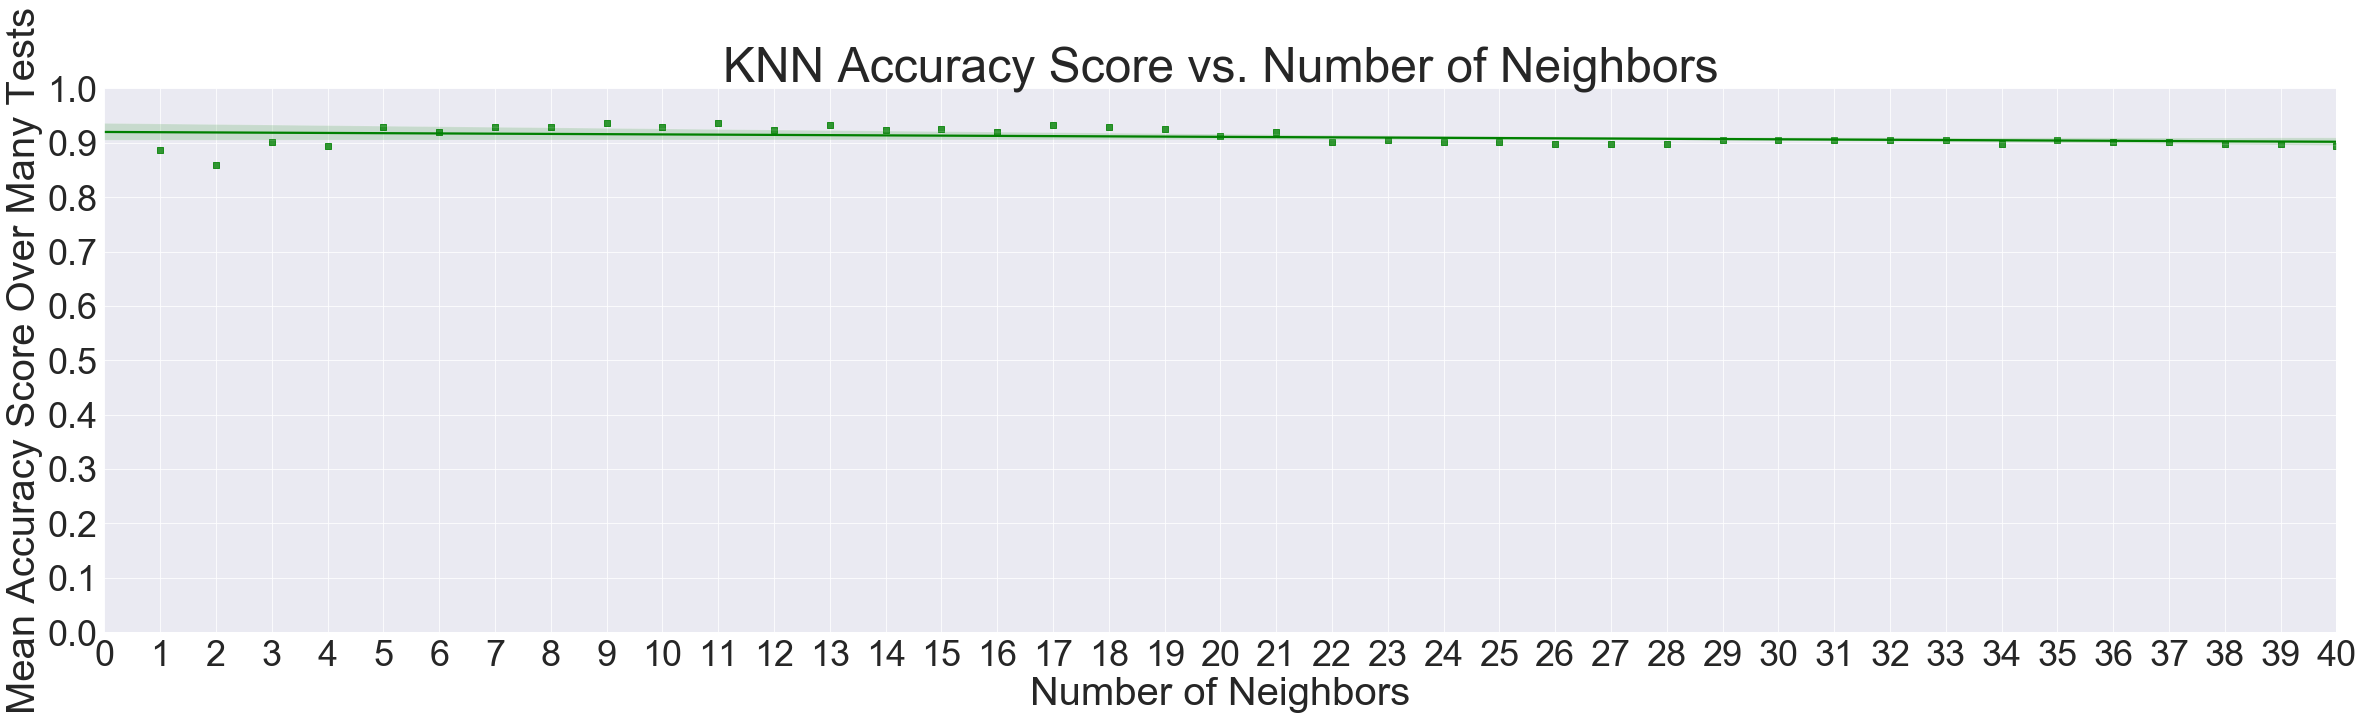

In [45]:
# 1.1
# What happens as you vary  𝐾  from small to large? Why? 
# Include a plot that shows the accuracy performance as you vary  𝑘 .
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
import numpy as np 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
%matplotlib inline 

score_arr = [] #accuracy score based on number of nearest neighbors k 
knn_classifier = KNeighborsClassifier()

#n is the number of neighbors used 
start=1
stop=40
step=1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)
print(X_train)
for n in range(start, stop+1, step): 
    knn_classifier=KNeighborsClassifier(n_neighbors=n, algorithm='auto', metric='minkowski', p=2) 
    knn_classifier.fit(X=X_train, y=y_train) 
    score_arr.append(knn_classifier.score(X=X_test, y=y_test)) 

print("score_arr:\n{}".format(score_arr))

#plotting accuracy score vs. number of neighbors 
score_arr=np.asarray(a=score_arr) 
fig=plt.figure(figsize=(40, 10)) 
sns.set_style(style='darkgrid')
sns.regplot(x=np.arange(start, stop+1, step), y=score_arr, marker='s', color='green', scatter=True)
plt.title(label="KNN Accuracy Score vs. Number of Neighbors", fontsize=48) 
plt.xlabel(xlabel="Number of Neighbors", fontsize=40) 
plt.ylabel(ylabel="Mean Accuracy Score Over Many Tests", fontsize=40)
plt.xlim(0, stop)
plt.ylim(0, 1.0, 0.1)
plt.xticks(ticks=np.arange(0, len(score_arr) + 1), fontsize=36) 
plt.yticks(ticks=np.arange(0, 1.1, 0.1), fontsize=36)
plt.grid(b=True, which='major', axis='both')
plt.show()

Small values of K make the prediction accuracy subpar due to insensitivity to outliers. As K increases, non-outliers eventually outnumber outliers by a huge factor. However, if K becomes too large, then disproportionate ratio of classes in the original dataset could cause misclassification. Suppose that K is set to very near the size of the original dataset. The K nearest neighbors might include the entire cluster of points in the correct class, but another class with a way higher population might be included as well due to the large K value. The error rate graph for KNN classifier looks like a U or curved V. The plot above measures accuracy using the score() function. Since accuracy is the inverse of error, the graph above looks like a stretched-out inverted U. The optimal value for K would be at the peak of the graph, in this case 9. 

In [48]:
# 1.2
# What is the optimal value for  𝑘  given this data?

optimal_k=np.argmax(score_arr) #indices of k with maximum accuracy scores 
max_accuracies=score_arr[optimal_k] #corresponding accuracies of optimal k's 

print("optimal k:\t{}".format(optimal_k + 1)) 
print("accuracy at optimal k:\t{}".format(max_accuracies))


optimal k:	9
accuracy at optimal k:	0.9368421052631579


In [49]:
# 1.3
# Compute the confusion matrix in the test set using the best value of  𝑘 .
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 

optimal_knn_classifier=KNeighborsClassifier(n_neighbors=optimal_k, algorithm='auto', metric='minkowski', p=2) 
optimal_knn_classifier.fit(X=X, y=y)
y_pred=optimal_knn_classifier.predict(X=X)
cm1=confusion_matrix(y_true=y, y_pred=y_pred) #confusion matrix for problem 1 
print("Confusion Matrix\n", cm1)


Confusion Matrix
 [[192  20]
 [ 15 342]]


In [42]:
# 1.4
# In a paragraph describe whether or not  𝑘 -NN performs well in high dimensional feature spaces.


k-NN should be used with extreme caution when used in a high dimensional feature space. Firstly, k-NN is not robust; when searching for the K nearest neighbors, the algorithm cannot tell outliers apart from non-outliers. The more different classes there are to label a test point, the higher the chance a mislabeling can occur. Furthermore, having more dimensions mean that the cluster of K nearest neighbors often becomes too diverse. There might be 4 classes present, but expanding K might introduce new classes and shrinking K might cut out some classes. In either scenario, changing K can also change the class that is most popular. Therefore, high dimensions make choosing an optimal K very difficult. In short, K-NN suffers from the curse of dimensionality. 

# Problem 2 - Decision Tree

In order to reduce email load, let's build a decision tree algorithm to decide whether or not to read an email or simply file it away instead. To train the model, consider the data set of binary-valued features about each email, including whether the author is known, whether the email is long or short, whether it has several key words, along with any final decision about whether to read it ($y = 1$ for "read", $y=-1$ for "discard").

| $x_1$: know author?  | $x_2$:  is long?     | $x_3$:  has research?| $x_4$:  has grade?   | $x_5$:  has lottery?     | $y$:    read?        |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
|          0           |          0           |          1           |          1           |          0           |         -1           |
|          1           |          1           |          0           |          1           |          0           |         -1           |
|          0           |          1           |          1           |          1           |          1           |         -1           |
|          1           |          1           |          1           |          1           |          0           |         -1           |
|          0           |          1           |          0           |          0           |          0           |         -1           |
|          1           |          0           |          1           |          1           |          1           |          1           |
|          0           |          0           |          1           |          0           |          0           |          1           |
|          1           |          0           |          0           |          0           |          0           |          1           |
|          1           |          0           |          1           |          1           |          0           |          1           |
|          1           |          1           |          1           |          1           |          1           |         -1           |

In the case of any ties, we will prefer to predict class $y = 1$. For the next steps consider $0 \log_2 0 = 0$.

1. Compute the information gain (entropy function) for each feature $x_i$. Which feature should be the root node?

2. Draw the complete decision tree that will be learned from this data. Justify every split based on information gain at every node.

In [117]:
# 2.1 
# Compute the information gain (entropy function) for each feature 𝑥𝑖. 
# Which feature should be the root node?

import numpy as np 
import pandas as pd 

def entropy(feature_array, feature_value, targets): 
    """compute the entropy of an attribute/feature""" 
    #all target values that matches given feature_value under specified feature 
    node=targets[np.argwhere(feature_array==feature_value)] #all target values in a node/cell 
    unique_targets=np.unique(ar=node) #unique target values caught in group 
    targets_proportions=np.asarray(a=[list(node).count(u)/float(node.size) for u in unique_targets])
#     print("targets_proportions", targets_proportions)

    #computing entropy 
    ent=-np.dot(a=targets_proportions, b=np.log2(targets_proportions))
    return ent



def entropy_weighted(feature_array, feature_value, targets): 
    """
        compute weighted entropy for a specified attribute/feature and feature value; 
        this is equivalent to (proportion of feature_value in feature) * entropy of the 
        node/cell containing target values aligned with the same feature_value 
    """
    feature_proportion=list(feature_array).count(feature_value) / float(feature_array.size) 
    ent_weighted=feature_proportion * entropy(feature_array=feature_array, 
                                              feature_value=feature_value,
                                             targets=targets) 
    return ent_weighted 

def entropy_feature(feature_array, targets): 
    """ 
        compute entropy for entire attribute/feature; this is the same as summing the weighted 
        entropies fo each unique value that the feature can have 
    """ 
    unique_features=np.unique(ar=feature_array) 
    weighted_entropies=np.asarray(a=[entropy_weighted(
        feature_array=feature_array, 
        feature_value=fv, 
        targets=targets) 
        for fv in unique_features]) 
    ent_feature=np.sum(a=weighted_entropies) 
    return ent_feature
    
def entropy_parent(targets): 
    """
        compute entropy for target values, treating all targets as if in the same cell/node 
    """
    unique_targets=np.unique(ar=targets) 
    targets_proportions=np.asarray(a=[list(targets).count(u)/float(targets.size) for u in unique_targets])
    
    #computing entropy 
    ent=-np.dot(a=targets_proportions, b=np.log2(targets_proportions))
    return ent 
    
def information_gain(feature_array, targets): 
    """ 
        compute information gain for a specific attribute/feature 
    """
    parent_entropy=entropy_parent(targets=targets)
    info_gain=parent_entropy - entropy_feature(feature_array=feature_array, targets=targets) 
    return info_gain 

#preparing data into arrays and dataframes 
#each attribute/feature 
x1=np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1])
x2=np.array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1])
x3=np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1]) 
x4=np.array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])
x5=np.array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

#targets 
y=np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, -1]) 

#shapes of each attribute/feature vector and targets 
print(x1.shape, x2.shape, x3.shape, x4.shape, x5.shape, y.shape)

# calculating information gain for each attribute/feature 
print("Information Gain Per Attribute/Feature:\n") 
email_features=['x1', 'x2',]
information_gain_dict={}
index=0
for feature in [x1, x2, x3, x4, x5]: 
    info_gain=information_gain(feature_array=feature, targets=y) 
    information_gain_dict.update({str(email_features[index]) : info_gain}) #updating information gain to dict 
    index += 1
    
print(information_gain_dict)    


(10,) (10,) (10,) (10,) (10,) (10,)
parent entropy:	0.9709505944546686
x1 entropy:	0.9245112497836532
info gain x1:	0.0464393446710154
Information Gain Per Attribute/Feature:

{'x1': 0.0464393446710154, 'x2': 0.6099865470109874, 'x3': 0.0058021490143456145, 'x4': 0.0912774462416801, 'x5': 0.0058021490143456145}


In [30]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [113]:
# 2.2
# Draw the complete decision tree that will be learned from this data. 
# Justify every split based on information gain at every node.

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 
from graphviz import Source 

email_dt=DecisionTreeClassifier(criterion='entropy', splitter='best') 
email_dt_fitted=email_dt.fit(X=X_train_email, y=y_train_email) 

email_export=export_graphviz(
    decision_tree=email_dt,
    out_file='email_decision_tree.dot', 
    feature_names=email_features, 
    filled=True, 
    rounded=True
)

Source(email_export); 

Initially, the attribute/feature contributing the most information gain is x2 (length of email). Therefore, x2 is placed as the root and determines the first split in the decision tree. At each further split, the attribute/feature used is justified by having contributing the most information gain considering the subset of the original dataset partitioned into its most recent split. Looking at the decision tree visual below, each additional level down decreases the entropy until reaching a leaf node with entropy = 0. 


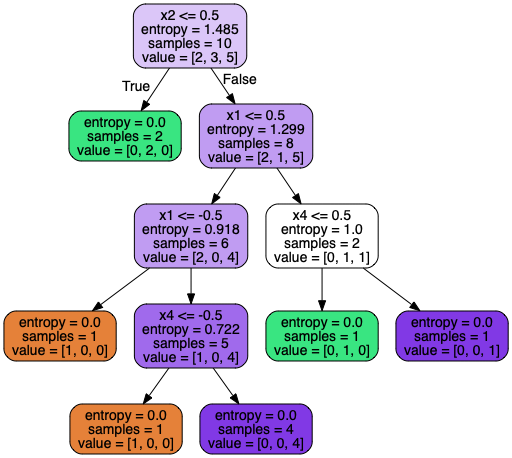

# Problem 3 - Decision Tree

In this problem you will work with the [Immunotherapy Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset). This data set contains information about wart treatment results of 90 patients using immunotherapy. The data set contains 7 features (sex, age, time, number of warts, type, area and induration diameter). The class label is the "result of treatment", where 0 means not successful and 1 means treatment was successful. 

Answer the following questions:

1. Split the training data into training and test using a 80/20 split.

2. Learn a decision tree classifier on the data. Visualize the resulting tree using ```plot_tree``` function from the module ```sklearn.tree``` (there is an example in Lecture 12).

3. Now, try varying the maximum depth parameter (```max_depth```), which forces the tree to stop after at most that many levels. Test values $1, 2, 3, 4, 5, 6$ and compare their performance (both training and test) against the full depth. Is complexity increasing or decreasing with the depth cutoff? Identify whether you think the model begins overfitting, and if so, when. If you use this parameter for complexity control, what depth would you choose at best?

4. Now, using high maximum depth ($d=6$), use ```min_samples_leaf``` to control complexity. Try values $\{2,4,6\}$. Is complexity increasing or decreasing as ```min_samples_leaf``` grows? Identify when (if) the model is starting to overfit, and what value you would use for this type of complexity control.

In [56]:
import pandas as pd
df=pd.read_excel('Immunotherapy.xlsx')

X=df.iloc[:,:6] # Training samples
y=df.iloc[:,7] # Training labels
features=df.columns.to_numpy()[:X.shape[1]+1]
targets=np.asarray(a=[df.columns.to_numpy()[X.shape[1]+1]])
print("fearures and target names:")
print(features, targets)
print("X and y types and shapes:")
print(type(X), type(y))
print(X.shape, y.shape)
print("Head of dataframe:")
print(df.head())


fearures and target names:
['sex' 'age' 'Time' 'Number_of_Warts' 'Type' 'Area' 'induration_diameter'] ['Result_of_Treatment']
X and y types and shapes:
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(90, 6) (90,)
Head of dataframe:
   sex  age   Time  Number_of_Warts  Type  Area  induration_diameter  \
0    1   22   2.25               14     3    51                   50   
1    1   15   3.00                2     3   900                   70   
2    1   16  10.50                2     1   100                   25   
3    1   27   4.50                9     3    80                   30   
4    1   20   8.00                6     1    45                    8   

   Result_of_Treatment  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  


In [67]:

# 3.1 
# Split the training data into training and test using a 80/20 split.
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
X_train_immuno, X_test_immuno, y_train_immuno, y_test_immuno=train_test_split(X, y, train_size=0.80, shuffle=False) 

#converting to numpy arrays 
X_train_immuno=X_train_immuno.to_numpy()
X_test_immuno=X_test_immuno.to_numpy()
y_train_immuno=y_train_immuno.to_numpy().reshape(y_train_immuno.size, 1)
y_test_immuno=y_test_immuno.to_numpy().reshape(y_test_immuno.size, 1)
print("Training and testing set shapes:")
print(X_train_immuno.shape, X_test_immuno.shape, y_train_immuno.shape, y_test_immuno.shape) 
print("X_train_immuno:\n{}".format(X_train_immuno))
print("X_test_immuno:\n{}".format(X_test_immuno))
print("y_train_immuno:\n{}".format(y_train_immuno)) 
print("y_test_immuno:\n{}".format(y_test_immuno))

Training and testing set shapes:
(72, 6) (18, 6) (72, 1) (18, 1)
X_train_immuno:
[[  1.    22.     2.25  14.     3.    51.  ]
 [  1.    15.     3.     2.     3.   900.  ]
 [  1.    16.    10.5    2.     1.   100.  ]
 [  1.    27.     4.5    9.     3.    80.  ]
 [  1.    20.     8.     6.     1.    45.  ]
 [  1.    15.     5.     3.     3.    84.  ]
 [  1.    35.     9.75   2.     2.     8.  ]
 [  2.    28.     7.5    4.     1.     9.  ]
 [  2.    19.     6.     2.     1.   225.  ]
 [  2.    32.    12.     6.     3.    35.  ]
 [  2.    33.     6.25   2.     1.    30.  ]
 [  2.    17.     5.75  12.     3.    25.  ]
 [  2.    15.     1.75   1.     2.    49.  ]
 [  2.    15.     5.5   12.     1.    48.  ]
 [  2.    16.    10.     7.     1.   143.  ]
 [  2.    33.     9.25   2.     2.   150.  ]
 [  2.    26.     7.75   6.     2.     6.  ]
 [  2.    23.     7.5   10.     2.    43.  ]
 [  2.    15.     6.5   19.     1.    56.  ]
 [  2.    26.     6.75   2.     1.     6.  ]
 [  1.    22.     1

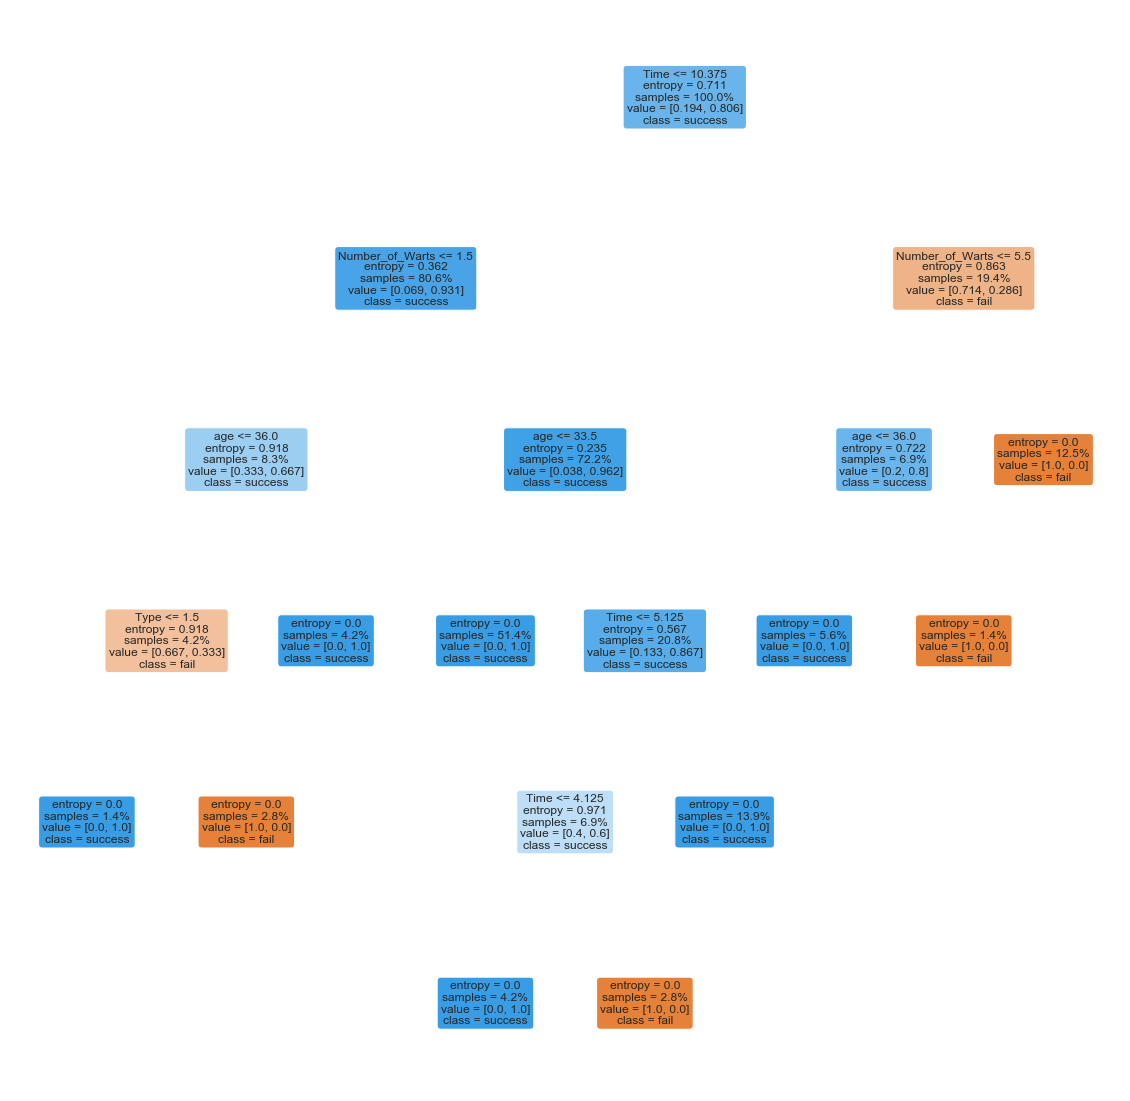

In [68]:
# 3.2 
# Learn a decision tree classifier on the data. 
# Visualize the resulting tree using plot_tree function from the module sklearn.tree 
# (there is an example in Lecture 12). 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz 
%matplotlib inline 

dtc_immuno=DecisionTreeClassifier(criterion='entropy', splitter='best')
dtc_immuno_fitted=dtc_immuno.fit(X=X_train_immuno, y=y_train_immuno)

fig_immuno=plt.figure(figsize=(20, 20))
ax_immuno=plt.axes()
plot_tree(
        decision_tree=dtc_immuno_fitted, 
        feature_names=features, 
        class_names=['fail', 'success'], 
        filled=True, 
        impurity=True, 
        proportion=True, 
        rounded=True,
        fontsize=12,
        ax=ax_immuno
        ) 
plt.show()


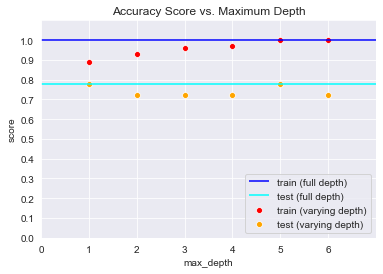

In [73]:
# 3.3 
# Now, try varying the maximum depth parameter (max_depth), which forces the tree to stop after at most that many levels. 
# Test values 1,2,3,4,5,6 and compare their performance (both training and test) against the full depth. 
# Is complexity increasing or decreasing with the depth cutoff? 
# Identify whether you think the model begins overfitting, and if so, when. 
# If you use this parameter for complexity control, what depth would you choose at best?

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier 

dtc=DecisionTreeClassifier(criterion='entropy', splitter='best') 
dtc.fit(X=X_train_immuno, y=y_train_immuno)

#scores using the training set (no depth constraint) 
dtc_full_depth_train_immuno_scores=dtc.score(X=X_train_immuno, y=y_train_immuno)

#scores using the testing set (no depth constraint)
dtc_full_depth_test_immuno_scores=dtc.score(X=X_test_immuno, y=y_test_immuno)
dtc_train_immuno_scores=[] #scores using the training set (varying depths) 
dtc_test_immuno_scores=[] #scores using the testing set (varying depths)
for depth in np.arange(1, 7): 
    dtc=DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=depth) 
    dtc.fit(X=X_train_immuno, y=y_train_immuno)
    dtc_train_immuno_scores.append(dtc.score(X=X_train_immuno, y=y_train_immuno))
    dtc_test_immuno_scores.append(dtc.score(X=X_test_immuno, y=y_test_immuno))

sns.set_style(style='darkgrid') 
plt.hlines(y=dtc_full_depth_train_immuno_scores, xmin=0, xmax=7, color='blue')
plt.hlines(y=dtc_full_depth_test_immuno_scores, xmin=0, xmax=7, color='cyan')
sns.scatterplot(x=np.arange(1, 7), y=dtc_train_immuno_scores, color='red')
sns.scatterplot(x=np.arange(1, 7), y=dtc_test_immuno_scores, color='orange')
plt.title(label='Accuracy Score vs. Maximum Depth')
plt.xlabel(xlabel='max_depth')
plt.ylabel(ylabel='score')
plt.grid(b=True, which='major', axis='both')
plt.legend(labels=['train (full depth)', 'test (full depth)', 'train (varying depth)', 'test (varying depth)'], 
           loc='lower right')
plt.xlim(0, 7)
plt.ylim(0, 1.1) 
plt.xticks(ticks=np.arange(0, 7))
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.show() 

Firstly, note that the decision tree classifier is fitted on the X and y training sets before all computations of scores. This makes a fair comparison by reserving the max_depth parameter to be the only variable that can change values. Since the training set is used to fit the data, it is unsurprising that the score using the training set is a constant 1.0 for full depth and tapers closely to 1.0 across varying depths. The best estimator for when overfitting occurs would depend on analyzing the scores for the test set across changing depths (orange dots). Starting with a max_depth value of 1, the complexity starts of very simple as most of the targets are successes (1's) in the original data. This means that purely high chance of success rather than deduction from features is used to systematically classify a test point. What if a test point has y=0 actually? Therefore, an optimal depth has to be deeper than just 1. As the max_depth increases to 4, the complexity increases and then decreases. This is visually the same as the accuracy decreasing and then increasing. As more attributes/features are used to split the decision tree, more complexity is added. However, better deduction by considering more features is taking place simultaneously. At max_depth=4, the trade off between complexity and deduction based on more features is paying off in favor of using more features. Afterwards, the score dips down again as complexity becomes too great. At 5 and after, overfitting starts to take effect. Note that both the training set and test set achieved the same score as each corresponding decision tree without a constraint on depth. That means with a max_depth of 5 or more, the classifier is overly familiarized with the original data used to fit the classifier. Therefore, max_depth=4 seems optimal and just right. It is not too small such that the imbalanced ratio of 1's to 0's is classifying true successes correctly by sheer probability and not too large to induce overfitting either. Note that the graph changes slightly when re-running the cell since the score() function calls the predict() functions in possibly changed order. 

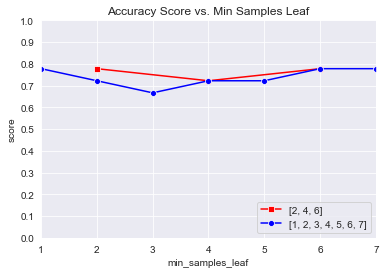

In [75]:
# 3.4 
# Now, using high maximum depth (𝑑=6), use min_samples_leaf to control complexity. 
# Try values {2,4,6}. Is complexity increasing or decreasing as min_samples_leaf grows? 
# Identify when (if) the model is starting to overfit, and what value you would use for this type of complexity control.

import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline 

dtc_immuno_6=DecisionTreeClassifier(max_depth=6)
dtc_immuno_6_scores=[] 
for msl in [2, 4, 6]: 
    dtc_immuno_6=DecisionTreeClassifier(max_depth=6, min_samples_leaf=msl) 
    dtc_immuno_6.fit(X=X_train_immuno, y=y_train_immuno) 
    dtc_immuno_6_scores.append(dtc_immuno_6.score(X=X_test_immuno, y=y_test_immuno)) 

dtc_immuno_6_all_scores=[] 
for msl in np.arange(1, 8): 
    dtc_immuno_6=DecisionTreeClassifier(max_depth=6, min_samples_leaf=msl) 
    dtc_immuno_6.fit(X=X_train_immuno, y=y_train_immuno) 
    dtc_immuno_6_all_scores.append(dtc_immuno_6.score(X=X_test_immuno, y=y_test_immuno)) 
    
#plotting accuracy scores vs. min_samples_leaf 
sns.set_style(style='darkgrid')
sns.lineplot(x=[2, 4, 6], y=dtc_immuno_6_scores, color='red', marker='s')
sns.lineplot(x=np.arange(1, 8), y=dtc_immuno_6_all_scores, color='blue', marker='o')
plt.title(label='Accuracy Score vs. Min Samples Leaf')
plt.xlabel(xlabel='min_samples_leaf')
plt.ylabel(ylabel='score')
plt.grid(b=True, which='major', axis='both')
plt.legend(labels=['[2, 4, 6]', '[1, 2, 3, 4, 5, 6, 7]'], loc='lower right')
plt.xlim(2, 6)
plt.ylim(0, 1) 
plt.xticks(ticks=np.arange(1, 8))
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.show()

Comparing only 2, 4, and 6 for min_samples_leaf, the score decreases when min_samples_leaf increases from 2 to 4 before rising again. What most likely happened is that there are naturally less than 4 data points (rows) ending up in some leaf nodes if min_samples_leaf was set to None. Setting the parameter to 4 forces some leaf nodes to accept outliers in order to meet the size requirement to be 4 or more. This can explain the dip in score at 4. After that, overfitting starts to take effect. Considering that there were way more successful treatments (1's in targets) than failed treatments (0's in targets), having a min_samples_leaf value too high would accidentally classify many test points as successful by chance. Since both training and test sets are derived from the same data set, which has a disproportionately high ratio of 1's to 0's, both training and test sets would have a similar ratio of 1's to 0's. The overfitting would correctly classify test points that are 1 by chance rather than deduction as it is extremely common to encounter a 1 in both sets. The data suggests that 2 is the optimal min_samples_leaf value. However, the scores based on min_samples_leaf set to integers 1-7 are also plotted. From the more complete plot, min_samples_leaf may have an optimal value close to but not equal to 2. Note that the graph changes slightly when re-running the cell since the score() function calls the predict() functions in possibly changed order. 

# Problem 4 - Random Forests

In this problem you will also work with the [Immunotherapy Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset).

Random Forests are bagged collections of decision trees, which select their decision nodes from bootstrap samples. You can implement this easily in ```BaggingClassifier``` using option ```n_estimators```$=n$, where $n$ is the number of learners.

Using your validation split from the previous problem, learn a bagged ensemble of decision trees on the training data and evaluate both training and validation performance.

For your individual learners, use high complexity control (depth cutoff 6, ```min_samples_leaf```=1, etc.), since the bagging
will be used to control overfitting.

* How many decision trees would you use in your ensemble?

* Compare the performance of a **single** decision tree (with overfitting parameters ```max_depth``` and ```min_samples_leaf```) and a random forests composed on overfitting decision trees. Comment the results.

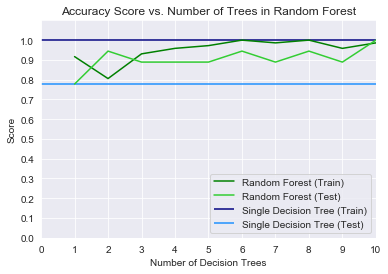

In [83]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
%matplotlib inline 

bc_immuno=BaggingClassifier()

bc_train_immuno_scores=[] #scores relating to number of trees used (predictions based on training set)
bc_test_immuno_scores=[] #scores relating to number of trees used (predictions based on test set)
max_n=10 #maximum number of decision trees in a single random forest to be tested 
for n in np.arange(1, max_n + 1): 
    bc_immuno=BaggingClassifier(
        base_estimator=DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=6, min_samples_leaf=1), 
        n_estimators=n, 
        bootstrap=True,
        bootstrap_features=True, 
        n_jobs=1
    )
    bc_immuno.fit(X=X_train_immuno, y=y_train_immuno.flatten())
    bc_train_immuno_scores.append(bc_immuno.score(X=X_train_immuno, y=y_train_immuno.flatten()))
    bc_immuno.fit(X=X_test_immuno, y=y_test_immuno.flatten()) 
    bc_test_immuno_scores.append(bc_immuno.score(X=X_test_immuno, y=y_test_immuno.flatten()))

# computing the score of a single decision tree with no restrictions on max_depth and 
# min_samples_leaf; prediction based on training set 
dtc_overfit_immuno=DecisionTreeClassifier(criterion='entropy', splitter='best')
dtc_overfit_immuno.fit(X=X_train_immuno, y=y_train_immuno)
dtc_overfit_immuno_train_score=dtc_overfit_immuno.score(X=X_train_immuno, y=y_train_immuno)

# computing the score of a single decision tree with no restrictions on max_depth and 
# min_samples_leaf; prediction based on test set 
dtc_overfit_immuno_test_score=dtc_overfit_immuno.score(X=X_test_immuno, y=y_test_immuno)

#plotting scores 
sns.set_style(style='darkgrid') 
plt.hlines(y=dtc_overfit_immuno_train_score, xmin=0, xmax=max_n, color='navy') 
plt.hlines(y=dtc_overfit_immuno_test_score, xmin=0, xmax=max_n, color='dodgerblue')
sns.lineplot(x=np.arange(1, 11), y=np.asarray(a=bc_train_immuno_scores), color='green', markers='s')
sns.lineplot(x=np.arange(1, 11), y=np.asarray(a=bc_test_immuno_scores), color='limegreen', markers='s')
plt.title(label='Accuracy Score vs. Number of Trees in Random Forest')
plt.xlabel(xlabel='Number of Decision Trees')
plt.ylabel(ylabel='Score')
plt.legend(labels=['Random Forest (Train)', 'Random Forest (Test)', 'Single Decision Tree (Train)', 'Single Decision Tree (Test)'], 
           loc='lower right')
plt.grid(b=True, which='major', axis='both')
plt.xlim(0, max_n)
plt.ylim(0, 1.1)
plt.xticks(ticks=np.arange(max_n + 1))
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.show()

As expected, the prediction accuracy for the overfitted decision tree built on the training set is 1 since the DecisionTreeClassifier also uses the training set for fitting. However, this helps us known when overfitting begins. As seen in the graph above, the random forest score for the training set slams into the overfitted decision tree score for the training set at n_estimators = 6. This means that for all values 6 and after, the BaggingClassifier is so familiarized with the training set used in fit() that the accuracy is nearly always 1 and hugs around the score for the overfitted decision tree. Therefore, the optimal value for n_estimators is right before overfitting. 5 is the optimal number of trees in the random forest as it is highly accurate without overfitting. In general, a random forest is more accurate in predictions than a single decision tree. For the testing set, compare the lines for random forest (light green) and decision tree (cyan); the random forest always have a higher score. Again, the decision tree score for the training set should be avoided for comparison since the fitting of the classifier is already based on the training set. 

# Problem 5 - Support Vector Machines

In this problem you will be working with the [Digits Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

Build a pipeline structure using ```make_pipeline``` that (1) standardizes the data, (2) extracts PCA features, and (3) performs classification using SVM with an RBF kernel.

1. Split the data into training and test sets with an 80/20 split.

2. Using ```GridSearchCV``` find the best set of parameters for: the parameter ```n_components``` (which control the number of components to project the data onto) in ```PCA``` and the parameters ```C``` (which controls the margin hardness) and ```gamma``` (which controls the size of the radial basis function kernel) in SVM.

3. Use the selected model to evaluate the results in both training and test set. Use ```classification_report``` to assess the full classification metric report.

In [35]:
from sklearn.datasets import load_digits

# Training samples (X) and training labels (y)
X_digits, y_digits=load_digits(return_X_y=True)
y_digits=y_digits.reshape(y_digits.size, 1)

print(X_digits.shape, y_digits.shape) 
print(type(X_digits), type(y_digits))
print("\nX_digits:\n{}".format(X_digits))
print("\ny_digits:\n{}".format(y_digits))


(1797, 64) (1797, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>

X_digits:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

y_digits:
[[0]
 [1]
 [2]
 ...
 [8]
 [9]
 [8]]


/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
# 5.1
# Split the data into training and test sets with an 80/20 split. 
from sklearn.model_selection import train_test_split 

X_train_digits, X_test_digits, y_train_digits, y_test_digits=train_test_split(X_digits, y_digits, train_size=0.80) 
print("Training and testing shapes:\n")
print(X_train_digits.shape, X_test_digits.shape, y_train_digits.shape, y_test_digits.shape)
print("\nX_train_digits:\n{}".format(X_train_digits))
print("\nX_test_digits:\n{}".format(X_test_digits)) 
print("\ny_train_digits:\n{}".format(y_train_digits))
print("\ny_test_digits:\n{}".format(y_test_digits))


Training and testing shapes:

(1437, 64) (360, 64) (1437, 1) (360, 1)

X_train_digits:
[[ 0.  1. 14. ...  4.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  2. 15. ...  9.  1.  0.]
 ...
 [ 0.  0.  1. ... 11.  2.  0.]
 [ 0.  0.  5. ... 15.  3.  0.]
 [ 0.  0.  8. ...  5.  0.  0.]]

X_test_digits:
[[ 0.  0.  9. ...  8.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  1. ... 16. 13.  1.]
 ...
 [ 0.  0. 12. ... 15.  1.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]
 [ 0.  2.  9. ...  9.  1.  0.]]

y_train_digits:
[[5]
 [1]
 [2]
 ...
 [6]
 [9]
 [3]]

y_test_digits:
[[3]
 [7]
 [6]
 [8]
 [8]
 [2]
 [6]
 [8]
 [4]
 [0]
 [1]
 [3]
 [3]
 [8]
 [0]
 [4]
 [9]
 [9]
 [3]
 [1]
 [2]
 [6]
 [5]
 [5]
 [3]
 [3]
 [7]
 [3]
 [0]
 [2]
 [9]
 [7]
 [9]
 [3]
 [3]
 [0]
 [8]
 [0]
 [9]
 [0]
 [1]
 [8]
 [4]
 [5]
 [5]
 [3]
 [2]
 [7]
 [2]
 [4]
 [3]
 [3]
 [9]
 [9]
 [5]
 [5]
 [7]
 [7]
 [7]
 [1]
 [5]
 [4]
 [2]
 [1]
 [7]
 [6]
 [9]
 [3]
 [3]
 [3]
 [9]
 [3]
 [7]
 [8]
 [9]
 [3]
 [9]
 [9]
 [1]
 [6]
 [0]
 [8]
 [4]
 [5]
 [0]
 [7]
 [9]
 [4]
 [7]

In [39]:
# 5.2
# Using GridSearchCV find the best set of parameters for: 
# the parameter n_components (which control the number of components to project the data onto) in PCA 
# and the parameters C (which controls the margin hardness) 
# and gamma (which controls the size of the radial basis function kernel) in SVM. 

import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

#best hyper-parameter values for PCA 
gs_digits_pca=GridSearchCV(
                    estimator=PCA(), 
                    param_grid={'n_components' : np.arange(1, 65)}, 
                    refit=True,
                    n_jobs=1
                    )
gs_digits_pca.fit(X=X_train_digits, y=y_train_digits.flatten())
best_n_components=gs_digits_pca.best_estimator_.n_components
print("Best n_components value:\t{}".format(best_n_components))

#best hyper-parameter values for svm.SVC 
#will take a long time to run 
gs_digits_svc=GridSearchCV(estimator=SVC(kernel='rbf'),
                          param_grid={'C' : np.arange(0.1, 2.0, 0.1), 
                                     'gamma' : np.arange(0.001, 0.01, 0.001)},
                           refit=True, 
                           n_jobs=1
                          )
gs_digits_svc.fit(X=X_train_digits, y=y_train_digits.flatten())
best_C=gs_digits_svc.best_estimator_.C
best_gamma=gs_digits_svc.best_estimator_.gamma
print("Best C value:\t{}".format(best_C))
print("Best gamma value:\t{}".format(best_gamma))


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Best n_components value:	57
Best C value:	1.1
Best gamma value:	0.001


In [43]:
# 5.3 
# Use the selected model to evaluate the results in both training and test set. 
# Use classification_report to assess the full classification metric report.

from sklearn.metrics import classification_report 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

# building pipeline 
pipeline_digits=make_pipeline(
    StandardScaler(),
    PCA(n_components=best_n_components), 
    SVC(C=best_C, kernel='rbf', gamma=best_gamma), 
    verbose=True
)

print("pipeline:\n{}".format(pipeline_digits)) 

y_pred_train_digits=pipeline_digits.fit(X=X_train_digits, y=y_train_digits).predict(X=X_train_digits)
cr_train_digits=classification_report(y_true=y_train_digits, y_pred=y_pred_train_digits)
print("\nClassification Report for Training Set:\n{}".format(cr_train_digits))

y_pred_test_digits=pipeline_digits.fit(X=X_train_digits, y=y_train_digits).predict(X=X_test_digits)
cr_test_digits=classification_report(y_true=y_test_digits, y_pred=y_pred_test_digits)
print("\nClassification Report for Test Set:\n{}".format(cr_test_digits))


pipeline:
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=57,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=True)
[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.1s


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.91      0.98      0.94       148
           2       0.99      0.97      0.98       148
           3       0.99      0.93      0.96       138
           4       0.99      0.97      0.98       145
           5       0.98      0.96      0.97       143
           6       0.99      0.99      0.99       151
           7       0.94      0.99      0.96       143
           8       0.91      0.91      0.91       135
           9       0.92      0.92      0.92       144

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, t

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Problem 6 - The Perceptron

Is Rosenblatt's Perceptron a universal learner (universal function approximator)? If no, explain why not. If yes, justify its implications.

No. To start with, part of the reason Rosenblatt created the Perceptron was to enhance some qualities of the earlier McCulloch-Pits artificial neuron. Nonetheless, the Perceptron remained with a single neuron of convergence. A Perceptron simply sums up the weighted inputs, produces an appropriate binary output, and adjusts the weights using the Perceptron algorithm. There were no hidden layers involved. There is a theorem, the Universal Approximation Theorem, says that any real function in any dimension can be approximated by a neural network with at least a single hidden layer of finite amount of neurons. Unfortunately, a single Perceptron handles the inputs and computes the output directly with no layers at all. A simple example can disprove that a Perceptron cannot learn all real functions. Suppose we have a trigonometric functions that repeats a pattern regularly, such as f(x)=sin(x). There input dimension is 1, and the output dimension is also 1. Regardless of what the bias is, training the Perceptron would lead to the weights being adjusted back and forth in circles due to the cyclic nature of the function. From a general perspective, a single Perceptron is very limiting because it uses a single heaviside function. A single Perceptron can model a constant function i.e. f(x)=c, or a sign function i.e. f(x)=sgn(x) effectively, but most curvy functions would need multiple Perceptrons to work together in order to combine many heaviside (or step) functions together. That way, a step-like approximation function, with each step function linked to some neuron, is modeled by a whole neural network resembling a real function. A single Perceptron cannot accomplish this demanding task. 

# Problem 7 - Multi-Layer Perceptron Decision Surface

The problem that inspired MLPs and the learning rule is the Exclusive OR (XOR) problem.

$$\text{XOR}(x_1,x_2) = x_1\bar{x}_2 + \bar{x}_1 x_2 $$

| $x_1$ | $x_2$ |  $t$  |
|-------|-------|-------|
|   0   |   0   |   0   |
|   0   |   1   |   1   |
|   1   |   0   |   1   |
|   1   |   1   |   0   |

Consider the activation function as heaviside function:

$$\phi(x) = \begin{cases}1, & x> 0 \\ 0, & x \leq 0\end{cases}$$

Suppose you had the noisy XOR data shown in the figure below. Answer the following questions:

<div><img src="figures/noisyXOR.png", width="500"><!div>

1. Design an MLP that can correctly solve this classification problem. (Find the weights and biases' values.)

2. What does the decision surface of this network look like graphically? Draw it out by hand.

3. For the MLP you designed, what is the predicted label for the test point $[0.5, 0.5]$?

In [3]:
# 7.1
# Design an MLP that can correctly solve this classification problem. (Find the weights and biases' values.)
weights={'X1-M1':1, 'X1-M2':1, 'X2-M2':1, 'X2-M3':1, 'M1-t':1, 'M2-t':-2, 'M3-t':1}
bias={'b-M1':-0.75, 'b-M2':-1.5, 'b-M3':-0.75} 
print("weights:\t{}".format(weights))
print("bias:\t{}".format(bias))

weights:	{'X1-M1': 1, 'X1-M2': 1, 'X2-M2': 1, 'X2-M3': 1, 'M1-t': 1, 'M2-t': -2, 'M3-t': 1}
bias:	{'b-M1': -0.75, 'b-M2': -1.5, 'b-M3': -0.75}


There are 2 inputs {X1, X2}, a single hidden layer of 3 neurons {M1, M2, M3}, and a single output t. The weights are all 1's except for the edge between M2 and t, where the weight is -2. The bias, b, has values {-0.75, -1.5, -0.75} respectively for the hidden layer. The weights and bias values are also given in the cell above. In summary, the MLP draws 3 decision boundaries. A point (x1, x2) is only classified as true only if at least one of the inputs is greater than 0.75 and the sum of the inputs is less than 1.5. This MLP conveys importance for true XOR points to be close to (1, 0) or (0, 1) and be inside the existing red clusters. In other words, any test point found outside the existing red clusters will more likely be classfied as false for XOR than true. 

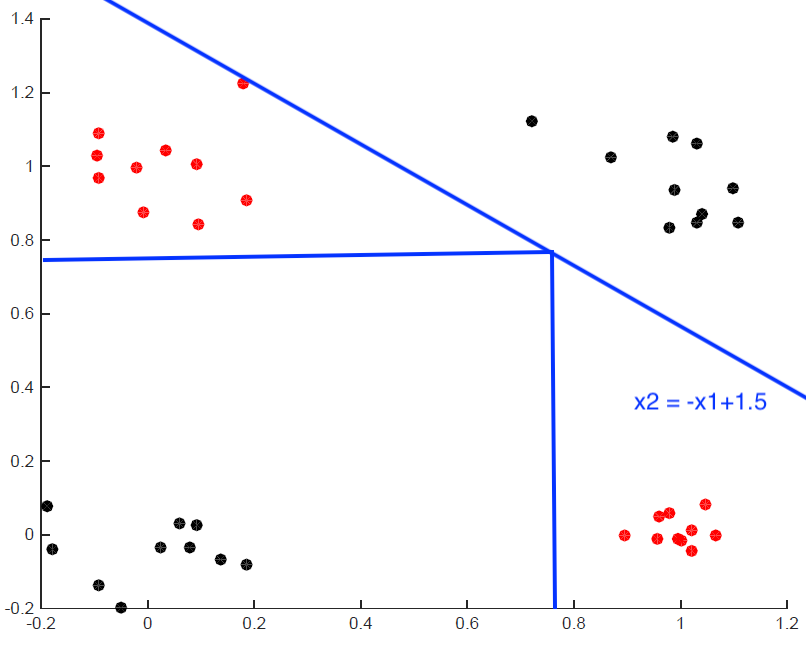

In [ ]:
# 7.2 
# What does the decision surface of this network look like graphically? Draw it out by hand.


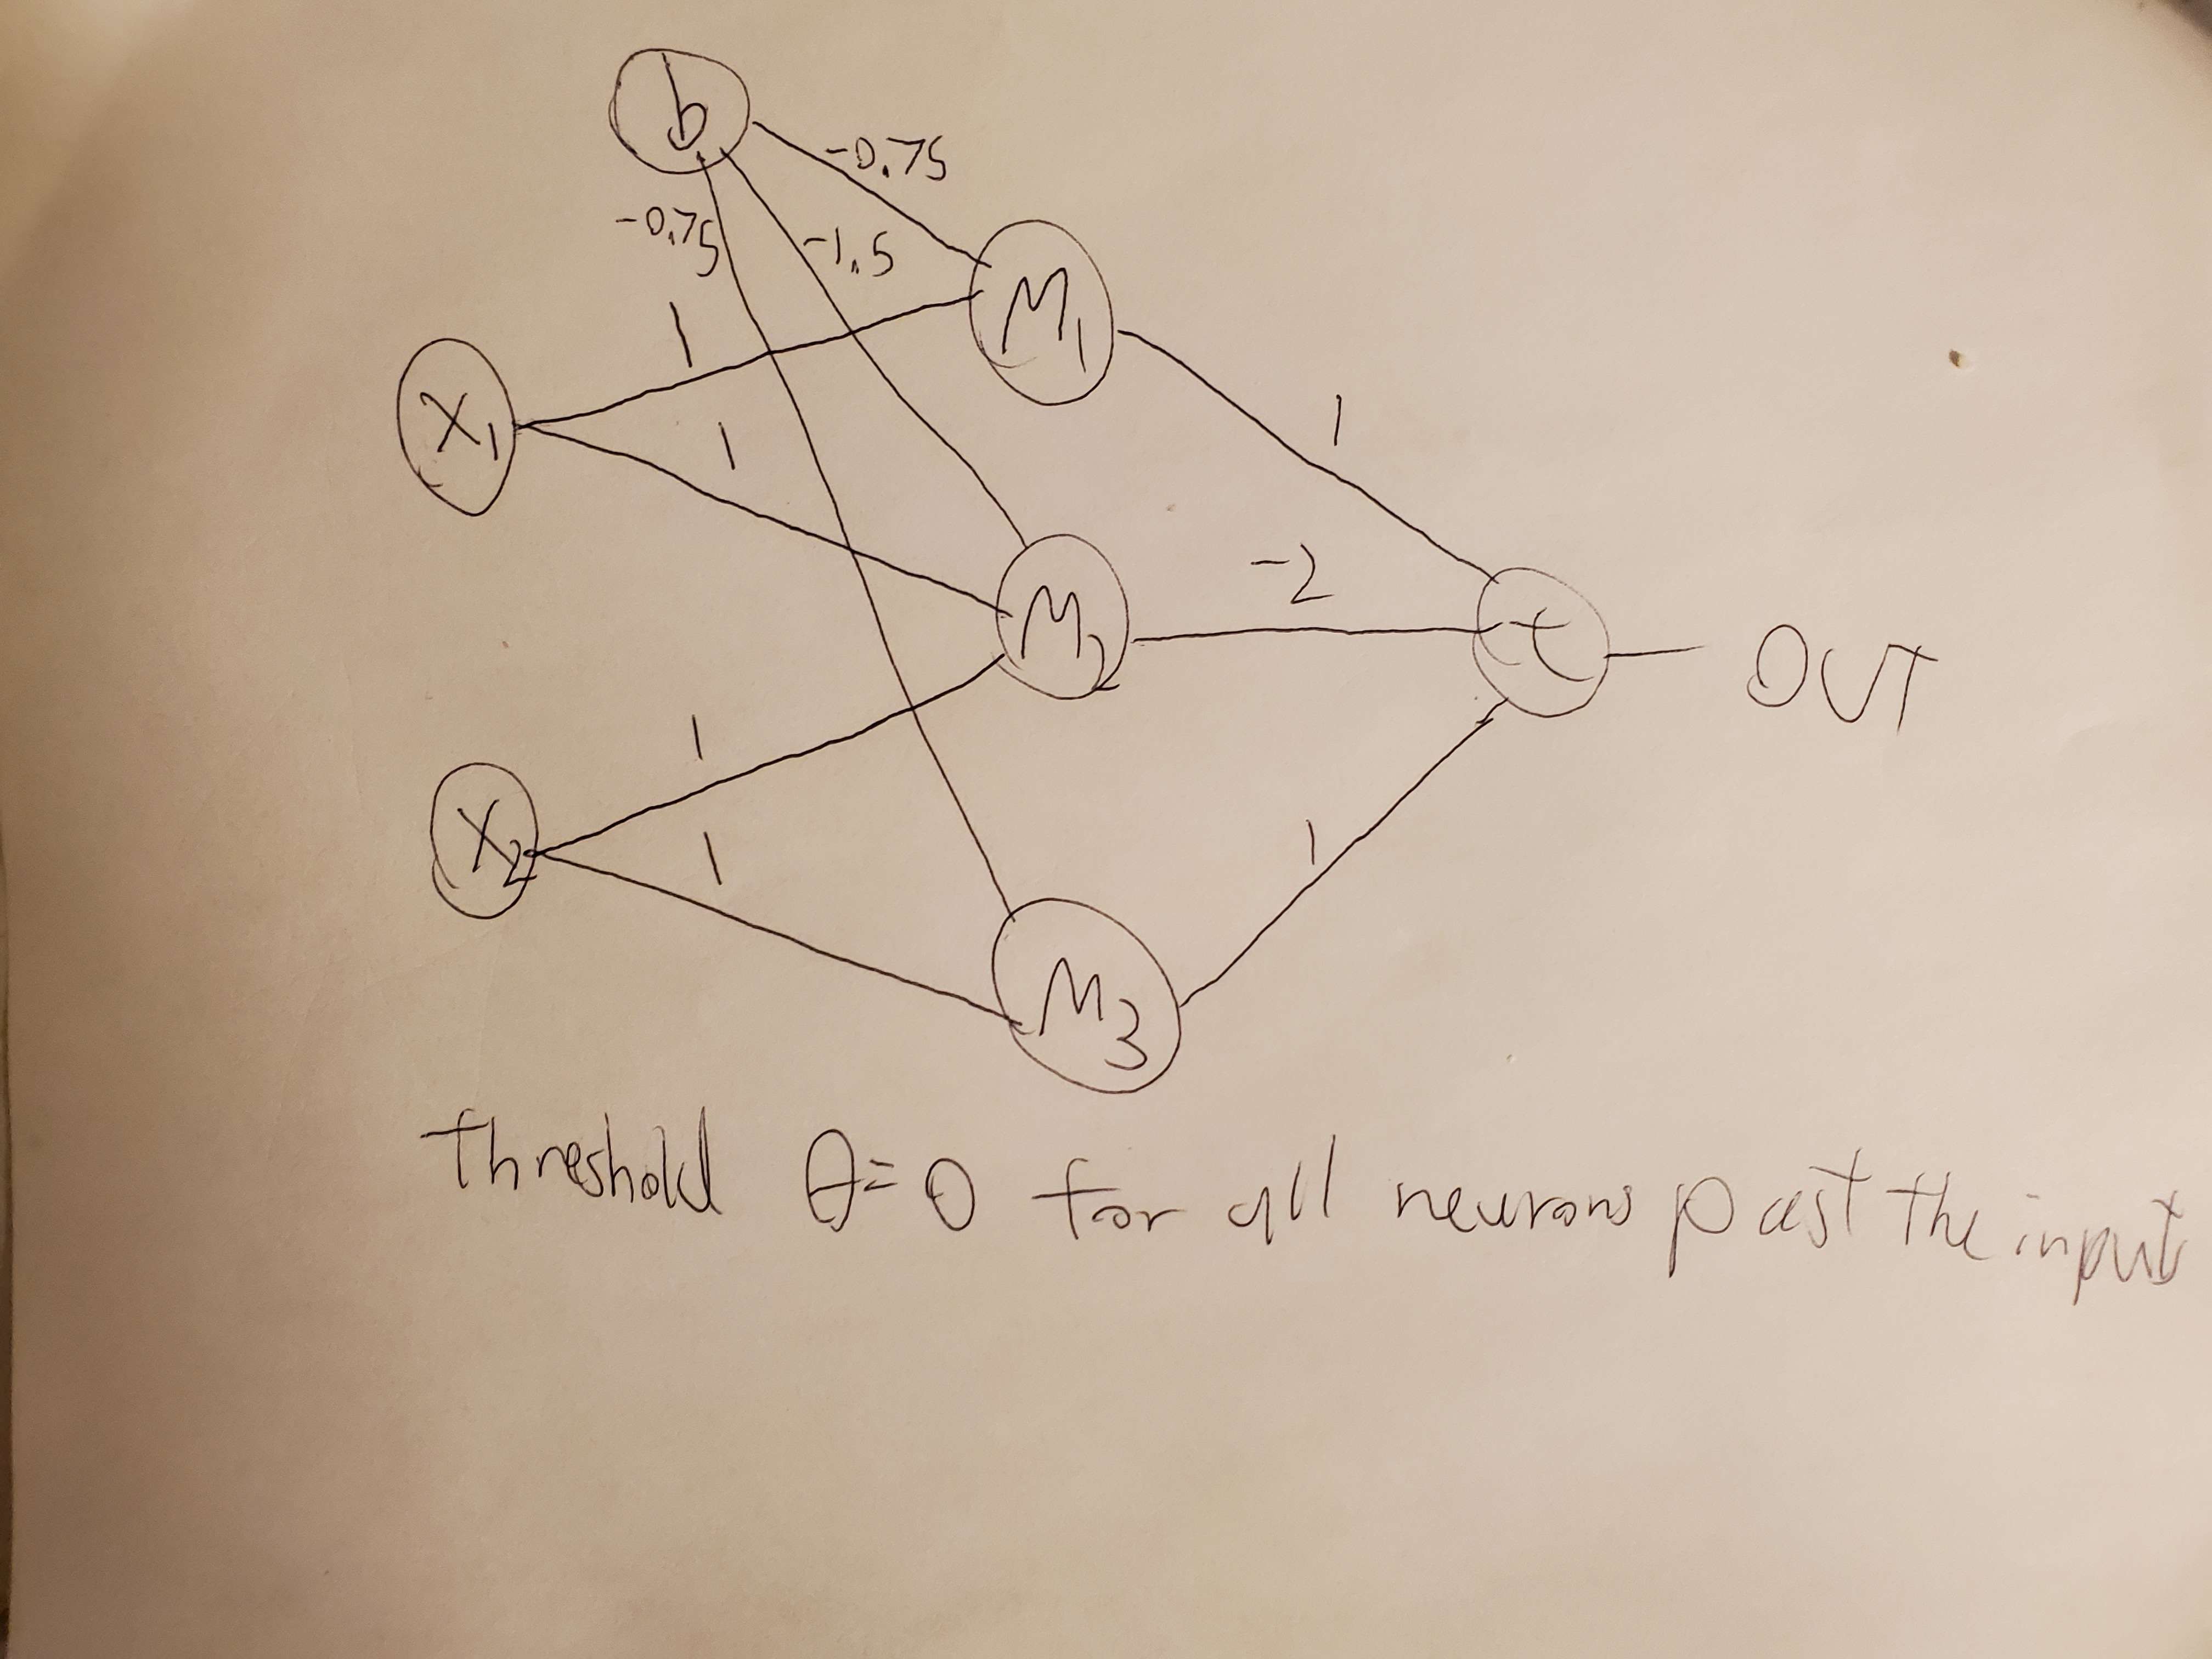

In [ ]:
# 7.3 
# For the MLP you designed, what is the predicted label for the test point [0.5,0.5]?


Since the point (0.5, 0.5) fails the criteria requiring either parameter to be greater than 0.75, the point is classified as false; it belongs to the black cluster near (0, 0). 